In [1]:
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt

In [2]:
file = pf.open('./psf_y3a1-v29.fits')

In [3]:
file[1].columns

ColDefs(
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'x'; format = 'D'
    name = 'y'; format = 'D'
    name = 'obs_e1'; format = 'D'
    name = 'obs_e2'; format = 'D'
    name = 'obs_T'; format = 'D'
    name = 'piff_e1'; format = 'D'
    name = 'piff_e2'; format = 'D'
    name = 'piff_T'; format = 'D'
    name = 'mag'; format = 'D'
    name = 'fov_x'; format = 'D'
    name = 'fov_y'; format = 'D'
    name = 'exp'; format = 'J'
    name = 'ccd'; format = 'I'
    name = 'band'; format = '1A'
    name = 'tiling'; format = 'I'
)

In [6]:
print(file[1].data['ccd'])

[ 1  1  1 ... 62 62 62]


In [12]:
x = file[1].data['fov_x']
y = file[1].data['fov_y']
print(len(x))

56707987


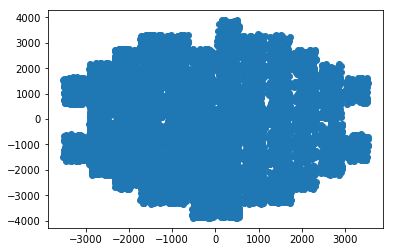

In [15]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
plt.figure()
plt.scatter(x[:10000], y[:10000])
plt.show()

In [4]:
id_shuffle = np.arange(len(file[1].data['ra']))
np.random.shuffle(id_shuffle)#to do: split into patches(?)

In [26]:
print(len(file[1].data['ra']))

56707987


In [48]:
curr = file[1].data[0]
curr_ra = curr['ra']
curr_dec = curr['dec']
# ra = file[1].data['ra'][id_shuffle[:30000000]]
# dec = file[1].data['dec'][id_shuffle[:30000000]]
# band = file[1].data['band'][id_shuffle[:30000000]]
# mag = file[1].data['mag'][id_shuffle[:30000000]]
ra = file[1].data['ra']
dec = file[1].data['dec']
band = file[1].data['band']
mag = file[1].data['mag']
obs_e1 = file[1].data['obs_e1']
obs_e2 = file[1].data['obs_e2']
obs_T = file[1].data['obs_T']
piff_e1 = file[1].data['piff_e1']
piff_e2 = file[1].data['piff_e2']
piff_T = file[1].data['piff_T']

In [18]:
import astropy
import astropy.units as u
from astropy.coordinates import SkyCoord, search_around_sky

In [19]:
curr_coord = SkyCoord(curr_ra*u.deg, curr_dec*u.deg)
coord = SkyCoord(ra*u.deg, dec*u.deg)


In [20]:
# coord = SkyCoord(np.array([1,1,1])*u.deg, np.array([1,1.5,3])*u.deg)

In [21]:
0.0003*60*60

1.0799999999999998

In [22]:
# idx1, idx2, sep2d, dist3d = search_around_sky(coord[:30000000], coord[:30000000], .0003*u.deg)
idx1, idx2, sep2d, dist3d = search_around_sky(coord, coord, .003*u.deg)

In [29]:
print(idx1)
print(idx2)
print(len(coord))
print(len(idx1))
print(len(idx2))
print(len(band))
print(len(sep2d[sep2d>0*u.deg]))

[       0        0        0 ... 56707985 56707985 56707986]
[       0   966806  1695979 ... 56707981 56707985 56707986]
56707987
227953651
227953651
56707987
171245664


In [73]:
colors = []
e1_residuals = []
e2_residuals = []
T_residuals = []

# for j in range(len(idx1)):
for j in range(100):
    mask = (idx1==j)
    if (len(band[idx2[mask]])>1) and ('g' in band[idx2[mask]]):

# mask = (idx1==100)
# print(idx2[mask])
# print(band[idx2[mask]])
# print(mag[idx2[mask]])
        gs_mag = []
        rs_mag = []
        gs_ind = []
        rs_ind = []
        obs_e1s = []
        obs_e2s = []
        obs_Ts = []
        piff_e1s = []
        piff_e2s = []
        piff_Ts = []
        for i in range(len(idx2[mask])):
            if band[idx2[mask]][i] == 'g':
                gs_mag.append(mag[idx2[mask]][i])
                gs_ind.append(idx2[mask][i])
                obs_e1s.append(obs_e1[idx2[mask][i]])
                obs_e2s.append(obs_e2[idx2[mask][i]])
                obs_Ts.append(obs_T[idx2[mask][i]])
                piff_e1s.append(piff_e1[idx2[mask][i]])
                piff_e2s.append(piff_e2[idx2[mask][i]])
                piff_Ts.append(piff_T[idx2[mask][i]])
            if band[idx2[mask]][i] == 'r':
                rs_mag.append(mag[idx2[mask]][i])
                rs_ind.append(idx2[mask][i])
        if (len(gs_mag) > 0) and (len(rs_mag) > 0):
            colors.append(np.mean(np.array(gs_mag)) - np.mean(np.array(rs_mag)))
            e1_residuals.append(np.mean(np.array(obs_e1s)) - np.mean(np.array(piff_e1s)))
            e2_residuals.append(np.mean(np.array(obs_e2s)) - np.mean(np.array(piff_e2s)))
            T_residuals.append(np.mean(np.array(obs_Ts)) - np.mean(np.array(piff_Ts)))
print(colors)
print(e1_residuals)
print(e2_residuals)
print(T_residuals)   

[0.7891416549682617, 0.4617652893066406, 0.4163551330566406, 0.2986640930175781, 0.3852519989013672, 1.6603965759277344, 1.4168701171875, 0.9862842559814453, 1.2502591269356849, 0.24012724558512488, 0.5570398966471366, 0.3054523468017578, 0.40804036458333215, 1.5376170476277657, 1.5376170476277657]
[-0.00387179370444804, -0.003252510820034568, 0.003194647573532568, -0.004076683317239996, 0.0014630421880465778, -0.007864208021846182, 0.017472808471694645, -0.00955358486536358, -0.01380579277785348, -0.010002788056462873, 0.0013365854737556393, 0.005948022887237756, 0.00820000447455434, 0.007243795450550632, 0.007243795450550632]
[-6.27923405189662e-05, -0.003179420130486766, -0.0027620427115521815, 0.009843069770960944, 0.004838317559781466, 0.028201334437881427, 0.0159630721966049, 0.01686995352456511, 0.01361218434318055, -0.009073293298534091, 0.002151709887540615, 0.003586421433032423, 0.00022199654812987804, 0.004808474669516919, 0.004808474669516919]
[-0.003976204341542888, 0.0139

9295


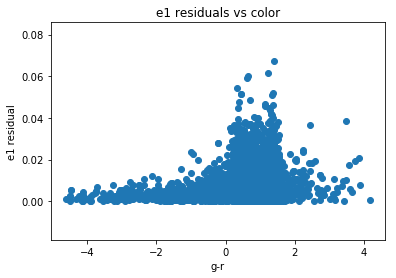

In [72]:
print(len(colors))
plt.figure()
plt.title("e1 residuals vs color")
plt.xlabel("g-r")
plt.ylabel("e1 residual")
plt.scatter(colors, np.abs(e1_residuals))
plt.show()

In [38]:
count = 0
for i in range(len(idx1)):
    mask = (idx1==i)
    if len(band[idx2[mask]])>1:
        if (('g' in band[idx2[mask]]) and ('r' in band[idx2[mask]])):
            count += 1
print(count)
            

KeyboardInterrupt: 

In [25]:
for i in range(len(idx1)):
    mask = (idx1==i)
    if len(band[idx2[mask]])>1:
        print(band[idx2[mask]])
        print(mag[idx2[mask]])

['z' 'i' 'Y' 'z' 'z' 'Y']
[19.3188324  19.93314934 19.18605042 19.32248688 19.63198662 19.14190674]
['z' 'z' 'z']
[20.57623291 20.54899597 20.5097084 ]
['z' 'z']
[20.64845276 20.57110977]
['z' 'z']
[19.65403175 19.65381241]
['z' 'i' 'z' 'z']
[20.2850666  20.5436554  20.3832016  20.54530334]
['z' 'Y']
[18.19027901 18.25627899]
['z' 'Y' 'z' 'Y' 'z']
[19.06183624 18.98472214 19.08802414 19.05449295 19.1004982 ]
['z' 'r' 'i' 'z']
[18.33983994 19.34585571 18.63677597 18.3313446 ]
['z' 'z' 'z']
[18.90432358 19.8334465  18.91022491]
['z' 'z' 'Y']
[16.71063614 16.72200012 16.71890259]
['z' 'Y' 'z' 'i']
[19.17284012 18.83656883 19.13314438 20.13559723]
['z' 'i']
[20.82722092 20.27383995]
['z' 'g' 'r' 'Y' 'i' 'g' 'r']
[17.83016586 18.97864151 18.18596077 17.86893463 17.96934509 18.9922142
 18.20661163]
['z' 'g' 'r']
[19.51520538 20.20454788 19.74278259]
['z' 'g' 'g' 'r' 'g' 'i' 'z' 'z']
[19.1354351  19.98912811 20.01367569 19.59738922 20.03842926 19.49060631
 19.13519287 19.20109177]
['z' 'r' 'i

['z' 'i' 'r']
[19.97929382 20.32655334 20.80569649]
['z' 'z']
[19.95175934 20.5126915 ]
['z' 'z']
[19.26458359 19.24661827]
['z' 'z' 'i' 'r' 'i' 'z' 'r' 'i' 'r' 'Y' 'z']
[19.98583031 18.52288437 18.64927673 20.21805954 18.63863754 18.47126007
 20.24702454 18.66130447 18.88142776 19.01114655 18.51047897]
['z' 'Y' 'r' 'Y' 'r']
[17.4064579  17.4780941  17.48400688 17.50231171 17.48136139]
['z' 'g' 'r' 'r' 'z' 'g' 'r']
[20.12530136 20.48248291 20.15929031 20.20239639 20.10791206 20.47621918
 20.17485428]
['z' 'i' 'i']
[19.74971008 20.2530098  20.30511475]
['z' 'Y' 'i' 'i']
[20.69760513 19.23338509 20.88285637 19.5795517 ]
['z' 'i' 'z' 'i' 'i']
[19.52297783 19.94242477 19.51347733 20.03280258 19.87357903]
['z' 'Y' 'r' 'z']
[19.03757477 18.9759903  20.46592903 19.03425217]
['z' 'i' 'i']
[19.41860008 20.26097107 20.30558395]
['z' 'r' 'Y' 'i' 'i' 'z' 'i' 'r' 'Y' 'z']
[18.93788528 19.14910316 18.48973656 18.7538681  18.72946548 18.93432617
 19.2992115  19.16340256 18.57706833 18.96922302]
['z' 

['z' 'z' 'i' 'Y']
[20.21984291 20.15996742 20.65378189 19.92963791]
['z' 'r' 'i']
[19.8711834  20.71358109 20.21843338]
['z' 'z' 'i' 'g' 'i' 'z' 'z']
[19.43762207 18.61296463 18.68297958 19.45877647 19.71751213 18.60973549
 18.57239914]
['z' 'i' 'i' 'z' 'Y' 'Y' 'Y' 'i' 'r']
[18.00720787 18.30013466 19.83959961 19.36679459 18.03068542 18.03794098
 19.37166977 19.79279518 20.93634605]
['z' 'g' 'z']
[17.35555267 17.78025436 20.93227577]
['z' 'i' 'g' 'r' 'i' 'r' 'r' 'Y']
[17.36982346 17.43440437 18.19841385 17.58763504 17.43869781 17.58891678
 17.5927887  17.38297272]
['z' 'i' 'Y']
[20.44624329 20.80784988 18.72509384]
['z' 'g' 'g' 'z' 'Y']
[19.60478973 20.14069557 20.15351677 19.59135437 16.8848381 ]
['z' 'z' 'z' 'z' 'z']
[19.97255325 20.4774456  19.94239998 19.83744049 20.36031723]
['z' 'z' 'i' 'g' 'i' 'z' 'z']
[19.43762207 18.61296463 18.68297958 19.45877647 19.71751213 18.60973549
 18.57239914]
['z' 'r' 'i' 'i' 'r' 'r' 'Y' 'g' 'i' 'r' 'Y']
[19.66973114 20.05099106 19.79886818 17.817680

['z' 'i' 'z']
[20.14837646 20.35650635 20.24558449]
['z' 'r' 'i' 'i' 'r' 'Y']
[19.72119522 20.10008812 19.86013412 19.87435532 20.11121559 19.96735764]
['z' 'i' 'Y' 'z' 'z' 'Y' 'Y' 'z' 'r' 'r' 'z' 'z']
[20.66760063 17.50180435 18.58220673 18.6970253  17.46706772 17.50619507
 16.35430145 16.3398838  16.61466217 20.45578766 18.73699951 16.32077789]
['z' 'Y' 'i']
[19.51808929 19.4044342  20.16797066]
['z' 'r' 'r']
[19.14648056 20.80999756 20.8268013 ]
['z' 'r']
[19.96894646 20.46952438]
['z' 'r' 'i' 'z' 'g']
[19.54175949 20.01968765 19.73465347 19.52503586 20.9496994 ]
['z' 'i' 'r' 'g' 'r' 'z']
[19.30053902 19.29693794 19.35073853 19.60532379 19.35868454 19.3294754 ]
['z' 'r' 'i' 'Y']
[18.17389297 20.1242981  18.74770546 18.1369915 ]
['z' 'g' 'g' 'Y' 'Y' 'i' 'z' 'i' 'z' 'z']
[18.33060074 19.03120613 19.03173447 18.39076996 18.39389038 18.40245819
 18.32273483 18.39752197 20.81079292 18.33882904]
['z' 'r' 'z']
[19.73855972 19.72206497 19.75440979]
['z' 'g' 'r' 'r' 'i' 'g' 'Y']
[18.96490669

['z' 'z']
[20.48901367 20.2711525 ]
['z' 'i' 'Y' 'i' 'Y']
[18.87138367 18.8589859  18.923769   18.87108231 18.86627388]
['z' 'g' 'i' 'r']
[19.02432632 20.35425377 19.17324448 19.5127697 ]
['z' 'i']
[20.33410645 20.93980789]
['z' 'g' 'r' 'Y' 'z' 'g' 'z' 'Y' 'g' 'r']
[17.02363205 18.91145325 17.67374039 17.0028801  17.03401184 18.90874481
 17.02968216 17.01367569 18.90810394 17.67959023]
['z' 'g' 'i' 'Y' 'Y' 'Y']
[18.11348724 20.75044823 18.50014114 18.01100159 18.08186722 17.98168182]
['z' 'r']
[20.00737    20.56652451]
['z' 'g' 'r' 'g' 'r' 'i']
[19.78813553 20.40473938 19.9377346  20.39059448 19.92899132 19.79607773]
['z' 'z']
[18.45645523 19.3289299 ]
['z' 'i' 'z' 'i' 'z' 'r' 'r']
[19.69330215 19.54612732 18.94968796 19.57498932 19.73017693 20.99285126
 20.97026634]
['z' 'i']
[19.90872192 19.98835373]
['z' 'z' 'z']
[20.62436676 20.57728958 20.7096386 ]
['z' 'g' 'r' 'r' 'i' 'g' 'g' 'r']
[17.88615799 20.10646248 19.34089279 19.36071968 19.11093521 20.10341263
 20.44355774 19.11291313]
[

['z' 'z']
[19.61195564 19.60427094]
['z' 'g' 'r' 'r' 'g']
[19.45997429 18.57350922 17.21473122 17.21269798 18.5553093 ]
['z' 'i' 'z']
[19.62928772 19.92863846 19.65292549]
['z' 'i' 'i' 'i' 'i' 'Y']
[18.42726135 18.9520359  19.76584435 18.94762802 19.74994469 18.33477402]
['z' 'r' 'Y' 'z' 'z' 'r' 'i' 'i' 'z']
[19.53442955 20.91093826 19.56451035 19.509758   19.55880737 20.96592331
 19.98758698 20.70501328 19.54808998]
['z' 'r' 'i' 'r' 'g' 'i' 'Y' 'Y' 'g']
[18.63094711 18.8977375  18.73437119 18.90299416 19.55212402 18.73616028
 18.73926163 18.70387268 19.53504181]
['z' 'i' 'r' 'r' 'z']
[17.69202042 17.94303894 18.47885895 18.4876976  17.69350624]
['z' 'z']
[20.35988617 20.38511848]
['z' 'r' 'i' 'r' 'Y' 'z' 'Y' 'Y']
[17.96556091 18.1123848  17.99705696 18.11837006 18.12563133 18.14739609
 18.03803635 18.06030273]
['z' 'z']
[19.59840393 19.62446213]
['z' 'i' 'z' 'z']
[20.16369438 20.69514656 20.17577934 20.03150177]
['z' 'g' 'i' 'Y' 'i' 'r']
[17.82679749 19.4496479  18.00336838 17.8304939

['z' 'r' 'Y' 'i' 'z' 'z' 'i' 'i' 'g' 'z' 'z' 'Y' 'g' 'z']
[19.32624054 19.64569473 19.32112503 19.43357086 19.27187538 19.3282547
 19.48277092 19.44356537 20.93264771 19.2747345  19.3551178  19.39179993
 20.28138351 19.33128357]
['z' 'i' 'i']
[19.32439804 20.04628372 20.16014099]
['z' 'i']
[19.51242638 19.77836227]
['z' 'Y' 'z' 'i' 'g']
[18.00056458 17.96240234 18.02154541 18.21235275 19.77469254]
['z' 'g' 'i']
[18.91429138 19.91277504 19.05827141]
['z' 'g' 'i' 'z' 'r' 'r']
[19.59054756 20.05436707 19.63227463 20.80125809 19.71010971 19.70306015]
['z' 'g' 'i' 'Y' 'z' 'z']
[19.20678711 19.85305786 19.28243828 18.80054855 19.17723083 19.21370316]
['z' 'i' 'g' 'Y' 'i' 'z' 'i' 'i' 'g' 'g']
[17.31958771 17.34995461 17.80935669 17.35874939 17.35753632 17.31890869
 17.34888077 17.35377121 17.82212067 17.83150101]
['z' 'z' 'z']
[20.48619843 20.56309891 20.69551849]
['z' 'i' 'r' 'r' 'r']
[20.37171364 20.48618317 20.55976677 20.56196976 20.55147552]
['z' 'z']
[19.5043335  19.51103973]
['z' 'i' '

['z' 'i' 'i' 'Y']
[17.86611176 18.30418777 18.30997467 17.82796097]
['z' 'r']
[20.42541122 20.86140442]
['z' 'z' 'i' 'i' 'z']
[20.46190262 20.48076439 20.85318947 20.8033905  20.47356224]
['z' 'g' 'z']
[18.33679581 19.74205017 18.34973145]
['z' 'Y']
[19.28652954 19.10739517]
['z' 'z' 'r']
[19.18367195 19.22112274 20.35434723]
['z' 'i' 'i' 'z' 'i']
[18.53204155 19.09560204 20.66567993 18.55683708 19.10876274]
['z' 'z']
[18.92538834 18.93072891]
['z' 'i']
[20.43055725 20.7637291 ]
['z' 'g' 'r' 'g' 'r' 'r' 'z']
[17.93011093 18.8956356  18.20021439 18.90103722 18.20676422 18.21334076
 17.93167305]
['z' 'g' 'i' 'i' 'r' 'r' 'z']
[16.79328918 18.66502953 17.00763321 17.01139832 17.44352722 17.44192505
 16.78158569]
['z' 'r']
[16.8002739  17.09253311]
['z' 'r' 'i' 'r' 'i']
[20.19372177 20.68795204 20.40529633 20.69026566 20.39690018]
['z' 'r' 'Y']
[17.53989601 18.43127251 17.46095276]
['z' 'r']
[18.31015778 18.67044449]
['z' 'r' 'i' 'r']
[18.99903488 19.42684937 19.15498543 19.46129608]
['z' '

['z' 'z']
[20.97922897 20.8253479 ]
['z' 'g' 'z' 'Y']
[20.78147697 18.43748093 17.47914124 17.51085854]
['z' 'r' 'i' 'g' 'Y' 'r' 'g' 'z']
[16.39662933 20.40391731 16.4502182  20.71875572 16.46260452 20.40945053
 20.72320175 20.34322357]
['z' 'r' 'z' 'z' 'g' 'r']
[17.5510025  17.72609711 17.54627228 19.89847565 18.25316429 20.82090378]
['z' 'z' 'g' 'r' 'Y' 'r' 'r' 'z']
[17.57647705 20.15374756 20.15337753 18.74527168 17.50148773 18.77002907
 18.76008415 17.59347534]
['z' 'r' 'z' 'r' 'r' 'i' 'z']
[19.10652924 20.53779602 19.12730789 20.53965759 20.54222488 19.53668594
 19.10112953]
['z' 'z']
[19.32886314 19.36305237]
['z' 'i']
[20.95448303 20.98019409]
['z' 'z' 'r' 'i']
[19.56428528 19.54929733 20.41397858 19.83108139]
['z' 'r' 'Y' 'i' 'r']
[20.07708549 20.95114136 19.96450996 20.72101212 20.99230194]
['z' 'z' 'g' 'r' 'Y' 'r' 'r' 'z']
[17.57647705 20.15374756 20.15337753 18.74527168 17.50148773 18.77002907
 18.76008415 17.59347534]
['z' 'i' 'i' 'z' 'z']
[17.78476334 19.41905212 17.816402

['z' 'i' 'Y' 'z']
[19.96153641 20.47669029 20.13792419 19.99440384]
['z' 'i' 'z' 'g' 'i']
[18.8375988  19.00258064 18.85262299 20.33461189 19.01534271]
['z' 'g' 'i' 'Y']
[16.9756279  17.57133484 17.01281738 17.01601601]
['z' 'g' 'r' 'r' 'z' 'Y' 'Y' 'i' 'i' 'z' 'i' 'g' 'r' 'Y' 'Y' 'z']
[17.67892838 20.62208176 19.20141983 18.73969078 18.07483101 17.99747086
 17.44232559 18.42378616 18.0050621  17.67088699 18.42505264 20.14931297
 18.75139236 18.01623154 18.02582932 18.09716034]
['z' 'z' 'r' 'Y']
[19.07669067 19.10969734 20.60110474 18.97639465]
['z' 'r' 'r']
[17.97478294 19.57571793 19.59691811]
['z' 'i' 'z']
[19.17993355 19.80914307 19.19464493]
['z' 'z']
[19.02672195 19.05424118]
['z' 'g' 'g' 'r' 'i' 'i' 'Y' 'Y' 'r' 'z']
[18.8680954  20.78716087 20.79452133 19.82245255 18.59761429 19.11466026
 18.2474556  19.32937622 19.65110397 18.86847305]
['z' 'r' 'z' 'r' 'z']
[19.53085136 20.90148544 19.53199196 20.93078995 19.58686256]
['z' 'r' 'i' 'Y' 'z' 'r']
[19.38648224 19.9465332  19.5655632

['z' 'g' 'Y' 'Y' 'z' 'i']
[17.61056519 18.29640007 17.689991   17.64868546 17.61747742 17.67362022]
['z' 'Y']
[20.38800049 20.11426926]
['z' 'i' 'z' 'z' 'i' 'i' 'r' 'z']
[18.72650909 19.25651169 18.72839355 20.05923843 19.27943611 20.53607178
 20.59493828 18.74822807]
['z' 'z' 'r' 'r' 'Y' 'z']
[18.55430031 20.35621262 18.89721107 18.90959167 18.60841751 18.59593582]
['z' 'g' 'r' 'i']
[18.26160812 19.2332058  18.55780792 18.35446167]
['z' 'r' 'i' 'z']
[19.96385193 20.3723259  20.06074715 20.02645493]
['z' 'r' 'Y' 'z']
[19.73236084 20.20319748 19.73279953 19.6399498 ]
['z' 'i' 'i']
[19.34536362 20.03880692 20.05881882]
['z' 'i' 'z']
[20.3182373  20.93468094 20.31511688]
['z' 'i' 'Y']
[20.54394531 20.32956696 19.3013916 ]
['z' 'g' 'Y']
[18.26139259 18.96894264 18.22600937]
['z' 'r']
[19.87324333 19.94881821]
['z' 'r' 'i' 'z' 'Y']
[17.1437149  17.247715   17.15213013 17.16319466 17.21260071]
['z' 'r' 'i' 'Y' 'g']
[17.93837929 18.24123764 18.03755379 17.9618206  18.97359657]
['z' 'z' 'i' 'z

['z' 'g' 'i' 'Y' 'r' 'r' 'g' 'i' 'g' 'z']
[19.05093765 19.57404709 19.06075668 19.09969711 19.12247086 19.15440369
 19.54138184 19.10723305 19.58956909 19.08042145]
['z' 'r' 'r' 'z' 'r' 'r' 'i']
[18.82184219 20.07520676 20.07266998 18.80757141 20.08020782 20.07839394
 19.20785522]
['z' 'r']
[19.54688454 19.59059906]
['z' 'i' 'z' 'i']
[19.10503006 19.53783035 19.11493301 19.55262375]
['z' 'r' 'Y' 'z' 'z' 'Y' 'Y' 'Y']
[18.58028984 19.98940277 18.47780609 18.58879852 18.56566811 18.38827515
 18.49144745 18.44691086]
['z' 'z' 'Y']
[18.64673615 18.62615204 18.58673859]
['z' 'i' 'Y' 'z' 'Y' 'g']
[17.72172928 18.18010712 17.65906143 17.71240616 17.63944244 20.76100159]
['z' 'i' 'z']
[18.00025558 18.31891632 17.99961662]
['z' 'r']
[18.75672531 19.68756104]
['z' 'i' 'r' 'i']
[18.25205231 18.76494217 19.9158802  18.78590012]
['z' 'g' 'g' 'i']
[19.62635612 20.46062469 20.44768143 19.72222519]
['z' 'g' 'i' 'r' 'i' 'r' 'g']
[20.18774796 20.12600327 18.88034058 19.14821243 18.89184952 19.17583466
 2

['z' 'i' 'z']
[18.7380867  18.85297775 18.70430756]
['z' 'Y']
[18.95822144 18.88563347]
['z' 'i']
[20.67499161 20.67121506]
['z' 'z' 'r' 'i' 'r' 'i']
[20.42671967 20.71994781 20.56096649 20.43292618 20.5214386  20.47273827]
['z' 'g' 'i' 'r' 'Y' 'g']
[17.38689804 17.86126709 17.40904617 17.49464417 17.44196701 17.8844986 ]
['z' 'z' 'r' 'i' 'r' 'i']
[20.42671967 20.71994781 20.56096649 20.43292618 20.5214386  20.47273827]
['z' 'r' 'r' 'i' 'z' 'i']
[18.87671661 18.7099514  19.97166824 19.2405777  18.8918457  17.69341278]
['z' 'r' 'i' 'r' 'r' 'g' 'Y' 'z' 'i' 'z' 'g' 'r']
[18.61363602 20.30274773 19.10150528 20.95421982 20.28770828 20.23799515
 18.49330711 18.63193703 19.10021973 20.47582245 20.27363586 20.25744629]
['z' 'g' 'Y' 'i' 'r' 'r']
[17.2978611  20.59642792 17.21584511 17.80774879 19.03177834 19.05787468]
['z' 'g' 'i' 'g' 'z']
[19.70069122 20.57378769 19.75148392 20.58243942 19.67273712]
['z' 'i' 'z']
[17.835186   18.25678825 17.83336639]
['z' 'i' 'g' 'i']
[19.79927635 20.10487747 

['z' 'r']
[20.40330887 20.7630024 ]
['z' 'i' 'z' 'z' 'z']
[19.1712265  19.76189041 19.16989708 19.16742325 19.16610718]
['z' 'g' 'r' 'z' 'z']
[19.60335159 20.02568054 19.69824409 19.60635567 19.59741211]
['z' 'i' 'i' 'z']
[20.08392715 20.39146042 20.3512001  20.55034256]
['z' 'r' 'i' 'z']
[19.81141281 20.69859123 20.08372498 19.74227905]
['z' 'z']
[20.35174942 20.28984642]
['z' 'i' 'z']
[18.30771255 18.55401611 18.32588005]
['z' 'i' 'z']
[18.97827911 19.14101791 18.98532104]
['z' 'Y' 'g']
[16.99539948 17.00530243 17.86081314]
['z' 'g' 'Y' 'r' 'g']
[17.73872566 20.80182648 17.66846657 19.26180649 20.74501419]
['z' 'i']
[18.50510216 18.57565308]
['z' 'g' 'Y' 'r']
[19.84310722 18.34906006 18.06668472 18.09777641]
['z' 'r']
[19.13103104 20.49014854]
['z' 'r' 'i' 'Y' 'z' 'r' 'r']
[19.16841316 20.07892418 19.45506287 19.19736671 19.14694977 20.09872437
 20.09666443]
['z' 'r' 'g' 'g' 'Y' 'r' 'i' 'z']
[18.55352783 17.96723366 18.85172272 19.25471115 17.56944656 18.74682999
 17.69902039 18.5413

['z' 'z' 'g' 'g' 'r' 'i' 'g' 'Y' 'i' 'i' 'r' 'Y' 'Y']
[20.53907776 18.34864235 20.16129112 20.16043854 18.9952755  18.56750298
 20.16453552 18.34804916 18.58516502 18.57987022 18.99601746 18.46665955
 18.35718155]
['z' 'i' 'i' 'i' 'z' 'r']
[20.420084   20.99342728 18.98540497 20.90415764 20.98357773 19.22304535]
['z' 'i' 'z' 'i']
[19.44905472 19.55092049 19.46110344 19.5568676 ]
['z' 'z' 'g' 'g' 'r' 'i' 'g' 'Y' 'i' 'i' 'r' 'Y' 'Y']
[20.53907776 18.34864235 20.16129112 20.16043854 18.9952755  18.56750298
 20.16453552 18.34804916 18.58516502 18.57987022 18.99601746 18.46665955
 18.35718155]
['z' 'i' 'r' 'z' 'r']
[20.49968719 20.58996582 20.71699142 20.55437851 20.81214905]
['z' 'g' 'r' 'i' 'i' 'r' 'g' 'z']
[19.74743271 20.7603569  20.08258629 19.86464882 19.87813377 20.09305954
 20.79098129 19.74166107]
['z' 'z' 'z']
[19.41048431 19.51071548 19.46939659]
['z' 'i' 'Y']
[18.21595764 18.72238541 18.05531693]
['z' 'Y' 'i']
[19.51515961 19.5680275  20.11818314]
['z' 'Y' 'Y']
[19.79196548 19.6

['z' 'i' 'Y' 'z' 'r' 'Y']
[18.3937149  18.4893074  18.24144745 18.40571976 18.75060654 18.40512848]
['z' 'i']
[19.485466  19.6823349]
['z' 'z' 'z' 'r']
[19.75251007 19.37770462 19.73611832 19.98431778]
['z' 'z' 'z' 'r']
[19.75251007 19.37770462 19.73611832 19.98431778]
['z' 'g' 'r' 'i' 'Y' 'z']
[17.99343491 20.89173317 19.43177414 18.41262436 17.98268509 18.00271034]
['z' 'g' 'i' 'i']
[18.44898796 19.56287766 18.56724739 18.57415962]
['z' 'i' 'i' 'z' 'z' 'z' 'g' 'r']
[18.58511543 17.28819656 17.27546501 18.6040802  18.58104324 17.20265961
 18.10120392 20.21049881]
['z' 'g' 'r' 'g' 'Y']
[18.8129158  19.76340103 19.1388092  19.75323296 18.74565887]
['z' 'g' 'z']
[17.97789764 20.16454315 17.98894882]
['z' 'g' 'Y' 'z' 'z' 'z']
[20.67424583 19.78216171 19.00119591 20.67697525 20.92721176 20.86174011]
['z' 'i' 'i']
[20.05256081 20.30193901 20.31821442]
['z' 'r' 'Y' 'r' 'i' 'g']
[18.82272911 18.91217613 18.87012482 18.9341011  18.85089302 19.47922134]
['z' 'i' 'r' 'r' 'r']
[19.2716732  19.471

['z' 'i' 'g' 'z' 'z' 'r' 'Y']
[17.34298325 17.62316895 20.10240746 17.3492794  19.19734955 19.47636032
 17.25457954]
['z' 'i' 'z' 'z' 'g']
[18.37412262 18.61904335 18.39914131 18.39047813 20.31816864]
['z' 'i' 'i' 'r' 'i' 'r']
[19.64168549 19.84780884 19.83446884 20.27360916 19.87002563 20.27501678]
['z' 'r' 'r' 'i' 'g' 'Y' 'Y' 'i' 'g' 'z' 'g' 'r']
[17.1795311  17.63208199 17.82325363 16.52539444 17.10461807 17.24014664
 17.0132637  17.47826004 17.11110497 17.00268555 18.61525726 17.52866173]
['z' 'r' 'i' 'r' 'g' 'r' 'z' 'r' 'Y']
[17.0260849  17.24724579 17.10043335 17.24032974 17.78071404 17.25164795
 17.043787   17.24675751 17.01608658]
['z' 'z' 'r' 'i' 'i' 'Y' 'z' 'Y' 'r' 'Y']
[20.93006897 18.25663376 18.63739014 20.40227509 18.38379478 18.25364304
 20.97563934 18.3235569  18.65197372 18.27235794]
['z' 'z' 'Y' 'r' 'r' 'r']
[16.61441803 20.73419571 16.63326645 16.85063171 16.8485527  16.84883881]
['z' 'Y' 'Y' 'Y']
[18.60907364 15.43688774 18.56348419 15.44029713]
['z' 'z']
[20.430273

['z' 'g' 'r' 'g' 'Y' 'Y' 'r' 'g']
[18.25948524 19.61984634 18.71519661 19.65035248 18.26436996 18.31149292
 18.69105721 19.60105324]
['z' 'r' 'i']
[19.4146595  19.50434685 19.43448257]
['z' 'r' 'z' 'r' 'z']
[19.32414627 20.13558006 19.27819443 20.13062668 19.28821945]
['z' 'z']
[19.56339264 19.57242966]
['z' 'r']
[17.05568695 17.90935898]
['z' 'g' 'g' 'r' 'i' 'r' 'z' 'Y' 'g']
[16.70587921 17.35297012 17.36571884 16.86441803 16.75356483 16.8788166
 16.7042923  16.74778938 17.32703972]
['z' 'Y']
[17.09871674 16.97714233]
['z' 'i' 'z' 'i' 'r']
[20.24733353 20.38067627 20.20778656 20.35719299 20.61961365]
['z' 'r']
[19.71193695 19.93521118]
['z' 'r' 'i']
[18.66087341 18.72740173 18.66718674]
['z' 'r']
[20.4939003  20.94960594]
['z' 'i']
[19.89628601 20.32525826]
['z' 'g' 'Y' 'g' 'r']
[19.69209671 20.04511452 15.81079388 20.05913544 15.88785076]
['z' 'i']
[19.66453552 20.34248161]
['z' 'i' 'z']
[20.56497383 20.9162674  20.68170357]
['z' 'g' 'g' 'g' 'i' 'i']
[17.78288269 18.5073452  18.51578

['z' 'r' 'i']
[17.89518738 19.63781166 18.39491463]
['z' 'g']
[19.93538666 20.4273777 ]
['z' 'i' 'z' 'r' 'z']
[17.60559845 17.95261002 17.61603928 18.80622482 17.61365891]
['z' 'g' 'r']
[18.40861893 19.19403076 18.62928009]
['z' 'r' 'i' 'i' 'Y' 'r' 'g']
[19.67946243 18.81275558 20.02114868 20.07040024 18.37814331 20.79977036
 19.76016617]
['z' 'i']
[20.25757217 20.65621948]


KeyboardInterrupt: 

In [13]:
matches = 0
for i in range(100):
    for j in range(100):
        dist = coord[i].separation(coord[j])
        if dist <= .0003*u.deg:
            matches+=1

In [14]:
print(matches)

100


In [21]:
print(np.unique(file[1].data['band']))

['Y' 'g' 'i' 'r' 'z']


In [31]:
print(len(file[1].data))

56707987


In [6]:
mag_cut_Y = file[1].data[(file[1].data['mag'] <= 21) & (file[1].data['mag'] >= 20) & (file[1].data['band'] == 'Y')]
mag_cut_g = file[1].data[(file[1].data['mag'] <= 21) & (file[1].data['mag'] >= 20) & (file[1].data['band'] == 'g')]
mag_cut_r = file[1].data[(file[1].data['mag'] <= 21) & (file[1].data['mag'] >= 20) & (file[1].data['band'] == 'r')]
mag_cut_i = file[1].data[(file[1].data['mag'] <= 21) & (file[1].data['mag'] >= 20) & (file[1].data['band'] == 'i')]
mag_cut_z = file[1].data[(file[1].data['mag'] <= 21) & (file[1].data['mag'] >= 20) & (file[1].data['band'] == 'z')]

In [7]:
print(len(mag_cut_Y), len(mag_cut_g), len(mag_cut_r), len(mag_cut_i), len(mag_cut_z))

408228 2596021 3716347 4503714 3378309


In [8]:
obs_e1 = file[1].data['obs_e1']
obs_e2 = file[1].data['obs_e2']
obs_T = file[1].data['obs_t']
piff_e1 = file[1].data['piff_e1']
piff_e2 = file[1].data['piff_e2']
piff_T = file[1].data['piff_t']

In [9]:
Y_e1_residuals = mag_cut_Y['obs_e1'] - mag_cut_Y['piff_e1']
Y_e2_residuals = mag_cut_Y['obs_e2'] - mag_cut_Y['piff_e2']
Y_T_residuals = mag_cut_Y['obs_T'] - mag_cut_Y['piff_T']
g_e1_residuals = mag_cut_g['obs_e1'] - mag_cut_g['piff_e1']
g_e2_residuals = mag_cut_g['obs_e2'] - mag_cut_g['piff_e2']
g_T_residuals = mag_cut_g['obs_T'] - mag_cut_g['piff_T']
r_e1_residuals = mag_cut_r['obs_e1'] - mag_cut_r['piff_e1']
r_e2_residuals = mag_cut_r['obs_e2'] - mag_cut_r['piff_e2']
r_T_residuals = mag_cut_r['obs_T'] - mag_cut_r['piff_T']
i_e1_residuals = mag_cut_i['obs_e1'] - mag_cut_i['piff_e1']
i_e2_residuals = mag_cut_i['obs_e2'] - mag_cut_i['piff_e2']
i_T_residuals = mag_cut_i['obs_T'] - mag_cut_i['piff_T']
z_e1_residuals = mag_cut_z['obs_e1'] - mag_cut_z['piff_e1']
z_e2_residuals = mag_cut_z['obs_e2'] - mag_cut_z['piff_e2']
z_T_residuals = mag_cut_z['obs_T'] - mag_cut_z['piff_T']

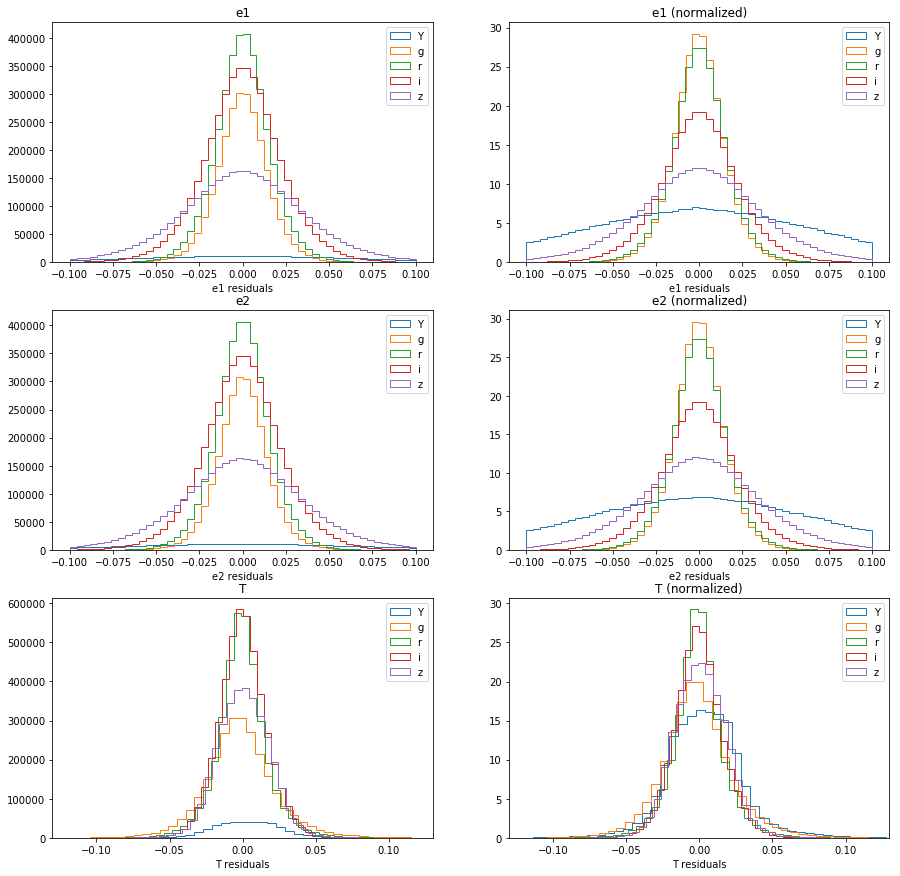

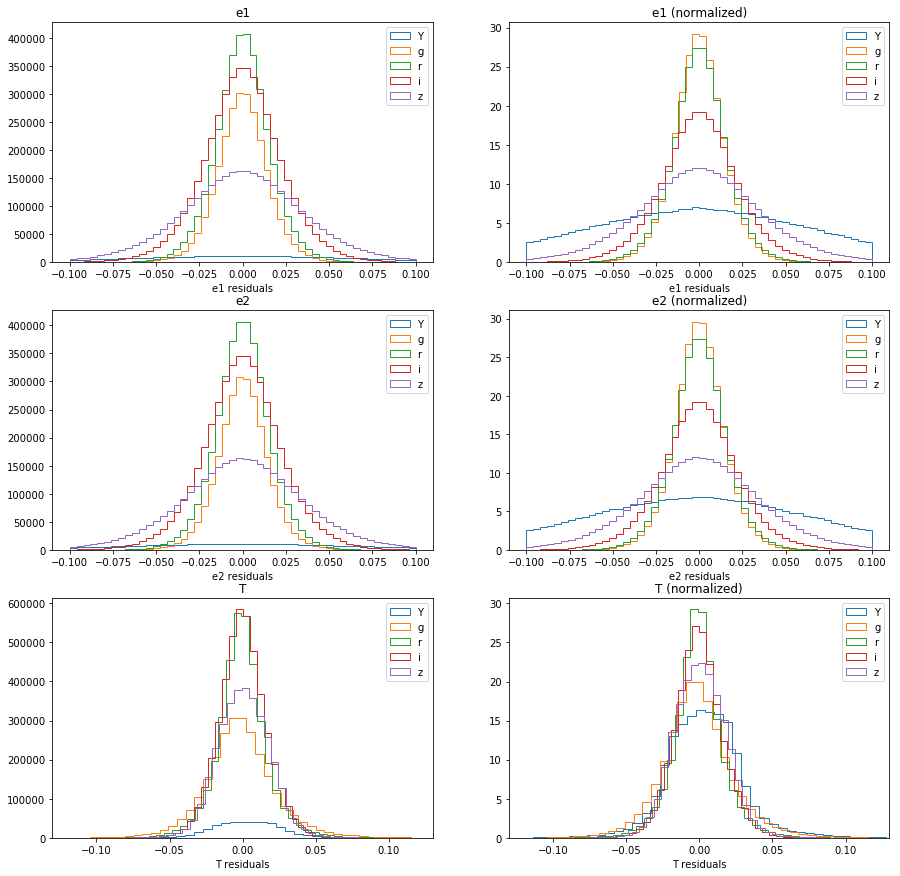

In [40]:
fig, axs = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].set_title('e1')
axs[0, 0].set_xlabel('e1 residuals')
axs[0, 0].hist(Y_e1_residuals, label='Y', bins=50, histtype='step', stacked=True, fill=False)
axs[0, 0].hist(g_e1_residuals, label='g', bins=50, histtype='step', stacked=True, fill=False)
axs[0, 0].hist(r_e1_residuals, label='r', bins=50, histtype='step', stacked=True, fill=False)
axs[0, 0].hist(i_e1_residuals, label='i', bins=50, histtype='step', stacked=True, fill=False)
axs[0, 0].hist(z_e1_residuals, label='z', bins=50, histtype='step', stacked=True, fill=False)
axs[0, 0].legend()
axs[0, 1].set_title('e1 (normalized)')
axs[0, 1].set_xlabel('e1 residuals')
axs[0, 1].hist(Y_e1_residuals, label='Y', bins=50, normed=True, histtype='step', stacked=True, fill=False)
axs[0, 1].hist(g_e1_residuals, label='g', bins=50, normed=True, histtype='step', stacked=True, fill=False)
axs[0, 1].hist(r_e1_residuals, label='r', bins=50, normed=True, histtype='step', stacked=True, fill=False)
axs[0, 1].hist(i_e1_residuals, label='i', bins=50, normed=True, histtype='step', stacked=True, fill=False)
axs[0, 1].hist(z_e1_residuals, label='z', bins=50, normed=True, histtype='step', stacked=True, fill=False)
axs[0, 1].legend()

axs[1, 0].set_title('e2')
axs[1, 0].set_xlabel('e2 residuals')
axs[1, 0].hist(Y_e2_residuals, label='Y', bins=50, histtype='step', stacked=True, fill=False)
axs[1, 0].hist(g_e2_residuals, label='g', bins=50, histtype='step', stacked=True, fill=False)
axs[1, 0].hist(r_e2_residuals, label='r', bins=50, histtype='step', stacked=True, fill=False)
axs[1, 0].hist(i_e2_residuals, label='i', bins=50, histtype='step', stacked=True, fill=False)
axs[1, 0].hist(z_e2_residuals, label='z', bins=50, histtype='step', stacked=True, fill=False)
axs[1, 0].legend()
axs[1, 1].set_title('e2 (normalized)')
axs[1, 1].set_xlabel('e2 residuals')
axs[1, 1].hist(Y_e2_residuals, label='Y', bins=50, normed=True, histtype='step', stacked=True, fill=False)
axs[1, 1].hist(g_e2_residuals, label='g', bins=50, normed=True, histtype='step', stacked=True, fill=False)
axs[1, 1].hist(r_e2_residuals, label='r', bins=50, normed=True, histtype='step', stacked=True, fill=False)
axs[1, 1].hist(i_e2_residuals, label='i', bins=50, normed=True, histtype='step', stacked=True, fill=False)
axs[1, 1].hist(z_e2_residuals, label='z', bins=50, normed=True, histtype='step', stacked=True, fill=False)
axs[1, 1].legend()

axs[2, 0].set_title('T')
axs[2, 0].set_xlabel('T residuals')
axs[2, 0].set_xlim([-.13, .13])
axs[2, 0].hist(Y_T_residuals, label='Y', bins=50, histtype='step', stacked=True, fill=False)
axs[2, 0].hist(g_T_residuals, label='g', bins=50, histtype='step', stacked=True, fill=False)
axs[2, 0].hist(r_T_residuals, label='r', bins=50, histtype='step', stacked=True, fill=False)
axs[2, 0].hist(i_T_residuals, label='i', bins=50, histtype='step', stacked=True, fill=False)
axs[2, 0].hist(z_T_residuals, label='z', bins=50, histtype='step', stacked=True, fill=False)
axs[2, 0].legend()
axs[2, 1].set_title('T (normalized)')
axs[2, 1].set_xlabel('T residuals')
axs[2, 1].set_xlim([-.13, .13])
axs[2, 1].hist(Y_T_residuals, label='Y', bins=50, normed=True, histtype='step', stacked=True, fill=False)
axs[2, 1].hist(g_T_residuals, label='g', bins=50, normed=True, histtype='step', stacked=True, fill=False)
axs[2, 1].hist(r_T_residuals, label='r', bins=50, normed=True, histtype='step', stacked=True, fill=False)
axs[2, 1].hist(i_T_residuals, label='i', bins=50, normed=True, histtype='step', stacked=True, fill=False)
axs[2, 1].hist(z_T_residuals, label='z', bins=50, normed=True, histtype='step', stacked=True, fill=False)
axs[2, 1].legend()
fig.savefig('img.jpg')
plt.show()

In [ ]:
#file[1].data[(file[1].data['ra']< 305.74)
#Y_data = file[1].data[file[1].data['band'] == 'Y']